In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from farrow_and_ball import *
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
import seaborn as sns
from scipy.cluster import hierarchy
import matplotlib as mpl
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
import networkx as nx
#from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from scipy.linalg import expm, sinm, cosm
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from numpy.linalg import eigvals


In [57]:
sizes = [50, 50]
probs = [[0.75, 0.01], [0.01, 0.75]]
Th = 0.1
G = nx.stochastic_block_model(sizes, probs, seed=0)
labelList = [i+1 for i in range(G.number_of_nodes())]

In [58]:
L = nx.laplacian_matrix(G).todense()
w = 1. / nx.laplacian_spectrum(G)
tau = w[33]
num = expm((-tau*L))
den = np.trace(num)
rho = num/den
Trho = np.copy(1. / rho)
Trho = np.maximum(Trho, Trho.T)
np.fill_diagonal(Trho, 0)
dists = squareform(Trho)
linkage_matrix1 = linkage(dists, "average")
tmax = linkage_matrix1[::, 2][-1]
linkage_matrix = linkage(dists/tmax, "average")

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


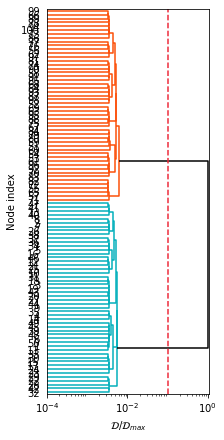

In [59]:
ax_dict = plt.figure(constrained_layout=True,
                     figsize=(3, 6)).subplot_mosaic("A")

dendrogram(linkage_matrix, labels=labelList, ax=ax_dict['A'], leaf_rotation=0,
           orientation='right', color_threshold=Th, above_threshold_color='k', leaf_font_size=10)
CM = fcluster(linkage_matrix, t=Th, criterion='distance')
cmap = build_colormap(MiscPalette.TONKA, True)
cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
#cmap1[0]=[46/255., 159/255., 223/255., 1.]
cmap1[0] = [0., 175/255., 187/255., 1.]
# cmap1[1]=[231/255.,184/255.,0.,1.]
cmap1[1] = [252/255., 78/255., 7/255., 1.]
hierarchy.set_link_color_palette(
    [mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap1])
cont = 0
ax_dict['A'].axvline(x=Th, color='#ED2939', linestyle='--')
ax_dict['A'].set_xscale('linear')
tmin = linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]
ax_dict['A'].set_xlim(tmin, tmax)
ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
ax_dict['A'].set_ylabel('Node index')
ax_dict['A'].set_xscale('log')
ax_dict['A'].set_xticks([1e-4, 1e-2, 1e0])
# plt.show()

In [60]:
linkage_matrix1

array([[7.10000000e+01, 8.10000000e+01, 2.19678200e+03, 2.00000000e+00],
       [2.90000000e+01, 3.20000000e+01, 2.20325194e+03, 2.00000000e+00],
       [5.40000000e+01, 1.00000000e+02, 2.22046336e+03, 3.00000000e+00],
       [6.30000000e+01, 6.70000000e+01, 2.22575718e+03, 2.00000000e+00],
       [0.00000000e+00, 4.90000000e+01, 2.22637306e+03, 2.00000000e+00],
       [6.20000000e+01, 6.80000000e+01, 2.22763816e+03, 2.00000000e+00],
       [6.40000000e+01, 1.02000000e+02, 2.23552417e+03, 4.00000000e+00],
       [1.10000000e+01, 4.50000000e+01, 2.24591609e+03, 2.00000000e+00],
       [6.50000000e+01, 9.80000000e+01, 2.24607454e+03, 2.00000000e+00],
       [1.70000000e+01, 3.00000000e+01, 2.24849799e+03, 2.00000000e+00],
       [1.00000000e+00, 7.00000000e+00, 2.25122064e+03, 2.00000000e+00],
       [7.40000000e+01, 8.70000000e+01, 2.25653136e+03, 2.00000000e+00],
       [5.20000000e+01, 5.30000000e+01, 2.26466469e+03, 2.00000000e+00],
       [7.50000000e+01, 7.60000000e+01, 2.26470170e

In [61]:
G = nx.stochastic_block_model(sizes, probs, seed=0)

for edge in G.edges():
    G.add_edge(edge[0], edge[1], weight=1)
    sign = G.get_edge_data(edge[0], edge[1])

H = nx.quotient_graph(G, G.graph["partition"], relabel=False)

community1 = list(list(H.nodes())[0])
sub_community1 = community1[:len(community1)//2]
for vertex in sub_community1:
    for edge in G.edges(vertex):
        if edge[1] not in sub_community1:
            G.add_edge(edge[0], edge[1], weight=-1)


In [62]:
A = nx.adjacency_matrix(G).toarray()
D = np.diag(np.abs(A).sum(axis=1)) 
L = D-A
w = 1. / eigvals(L)
w[0] = -w[0]
tau = w[33]
num = expm((-tau*L))
den = np.trace(num)
rho = num/den
Trho = np.copy(1. / rho)
Trho = np.maximum(Trho, Trho.T)
np.fill_diagonal(Trho, 0)
old_d = squareform(Trho)
dists = np.max(old_d) - old_d
linkage_matrix1 = linkage(dists, "average")
tmax=linkage_matrix1[::, 2][-1]
linkage_matrix = linkage(dists/tmax, "average")



/tmp/ipykernel_14478/3863972785.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


In [63]:
linkage_matrix1

array([[3.20000000e+01, 6.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.50000000e+01, 8.10000000e+01, 7.97146301e+04, 2.00000000e+00],
       [4.60000000e+01, 8.00000000e+01, 5.71211570e+05, 2.00000000e+00],
       [4.10000000e+01, 5.40000000e+01, 6.46212406e+05, 2.00000000e+00],
       [2.90000000e+01, 6.30000000e+01, 8.02339403e+05, 2.00000000e+00],
       [3.50000000e+01, 7.60000000e+01, 1.03412400e+06, 2.00000000e+00],
       [4.70000000e+01, 7.70000000e+01, 1.12439283e+06, 2.00000000e+00],
       [2.80000000e+01, 6.40000000e+01, 1.18060348e+06, 2.00000000e+00],
       [3.60000000e+01, 9.20000000e+01, 1.22318901e+06, 2.00000000e+00],
       [4.90000000e+01, 6.70000000e+01, 1.55386850e+06, 2.00000000e+00],
       [3.00000000e+01, 9.80000000e+01, 1.59137829e+06, 2.00000000e+00],
       [4.00000000e+01, 9.40000000e+01, 1.59184226e+06, 2.00000000e+00],
       [3.30000000e+01, 8.70000000e+01, 1.75710187e+06, 2.00000000e+00],
       [2.60000000e+01, 5.20000000e+01, 1.76998047e

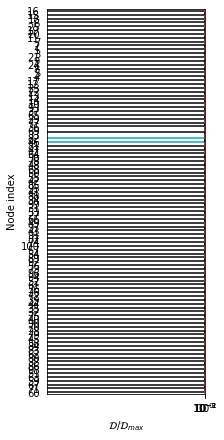

In [37]:
ax_dict = plt.figure(constrained_layout=True,
                     figsize=(3, 6)).subplot_mosaic("A")

dendrogram(linkage_matrix,labels=labelList,ax=ax_dict['A'],leaf_rotation=0,orientation='right',color_threshold=Th,above_threshold_color='k',leaf_font_size=10)
CM=fcluster(linkage_matrix, t=Th, criterion='distance')
cmap = build_colormap(MiscPalette.TONKA, True)
cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
#cmap1[0]=[46/255., 159/255., 223/255., 1.]
cmap1[0]=[0., 175/255., 187/255., 1.]
#cmap1[1]=[231/255.,184/255.,0.,1.]
cmap1[1]=[252/255., 78/255., 7/255., 1.]
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap1])
cont=0
ax_dict['A'].axvline(x = Th, color = '#ED2939', linestyle = '--')
ax_dict['A'].set_xscale('linear')
tmin=linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax=linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]
ax_dict['A'].set_xlim(tmin,tmax)
ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
ax_dict['A'].set_ylabel('Node index')
ax_dict['A'].set_xscale('log')
ax_dict['A'].set_xticks([1e-4,1e-2,1e0])


plt.show()